# Libraries

In [2]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Data scaling
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Evaluation
from sklearn.metrics import mean_squared_error

In [9]:
# Libraries for custom Transformer
from sklearn.base import BaseEstimator, TransformerMixin

# Data Loading

In [3]:
import pandas as pd
PATH = "dataset/melb_data.csv"

housing = pd.read_csv(PATH)

In [4]:
housing.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


In [5]:
housing.shape

(13580, 21)

In [6]:
housing.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [28]:
X = housing.drop('Price', axis=1)
# y = housing[['Price']]
y = housing.Price

# Data Type 

In [112]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [109]:
# Classify numerical and categorical columns
num_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in X.columns if X[col].dtype in ['object']]
print('num_cols: ', num_cols)
print('cat_cols: ', cat_cols)
print()


card = [X[cname].nunique() for cname in cat_cols]
for a,b in zip(cat_cols, card):
    print(a, b)
    
print()

# Cols with low cardinality
low_card_cols = [col for col in cat_cols if X[col].nunique() < 10]
print('low_card_cols: ', low_card_cols)

high_card_cols = [col for col in cat_cols if X[col].nunique() >= 10]
print('high_card_cols: ', high_card_cols)

num_cols:  ['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
cat_cols:  ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']

Suburb 314
Address 13378
Type 3
Method 5
SellerG 268
Date 58
CouncilArea 33
Regionname 8

low_card_cols:  ['Type', 'Method', 'Regionname']
high_card_cols:  ['Suburb', 'Address', 'SellerG', 'Date', 'CouncilArea']


# Data Cleaning

## Remove Unwanted Columns

In [110]:
# 1. Transfomer for deleting unwanted cols

# columns to be deleted
unwanted_cols = ['Date', 'Suburb', 'Address', 'SellerG', 'Postcode', 'haha']
# remaining cat_cols = ['Type', 'Method', 'CouncilArea', 'Regionname']

class RemoveUnwantedCatTrans(BaseEstimator, TransformerMixin):
    def __init__(self, cols = unwanted_cols):
        self.cols = cols
        pass
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
#         X_ = X.copy()
#         for col in self.cols:
#             if col in X_:
#                 X_ = X_.drop(col, axis=1, inplace=True)
        X_ = X.drop(self.cols, axis=1, errors='ignore')
#         print(X_)
        return X_

In [38]:
# Update num_cols & cat_cols once determine which cols to be removed
for col in unwanted_cols:
    if col in num_cols:
        num_cols.remove(col)
    if col in cat_cols:
        cat_cols.remove(col)
    if col in high_card_cols:
        high_card_cols.remove(col)
    if col in low_card_cols:
        low_card_cols.remove(col)
        
print('After removing unwanted columns:')
print('num_cols: ', num_cols, len(num_cols))
print('cat_cols: ', cat_cols, len(cat_cols))
print('high_card_cols: ', high_card_cols, len(high_card_cols))
print('low_card_cols: ', low_card_cols, len(low_card_cols))

After removing unwanted columns:
num_cols:  ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount'] 11
cat_cols:  ['Type', 'Method', 'CouncilArea', 'Regionname'] 4
high_card_cols:  ['CouncilArea'] 1
low_card_cols:  ['Type', 'Method', 'Regionname'] 3


## Fill NaN Values

In [39]:
imputer_col_trans = ColumnTransformer([
    ('imputer_num', SimpleImputer(strategy='median'), num_cols),
    ('imputer_col', SimpleImputer(strategy='most_frequent'), cat_cols)
])

## Pipeline

In [40]:
# Removal & Parsing Date Pipeline!!!
clean_pipe = Pipeline(steps=[
    ('rmUnwanted', RemoveUnwantedCatTrans()),
    ('imputer', imputer_col_trans),
#     ('parseDate', ParseDateTrans())
])

In [102]:
X_cleaned = pd.DataFrame(clean_pipe.fit_transform(X))
remaining_cols = num_cols + cat_cols
X_cleaned.columns = remaining_cols

In [103]:
X_cleaned.head(2)

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Type,Method,CouncilArea,Regionname
0,2.0,2.5,2.0,1.0,1.0,202.0,126.0,1970.0,-37.7996,144.9984,4019.0,h,S,Yarra,Northern Metropolitan
1,2.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,h,S,Yarra,Northern Metropolitan


In [105]:
X_ = X_cleaned[num_cols].astype('float64')
X_cleaned = X_.join(X_cleaned[cat_cols])

In [108]:
X_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13580 non-null  float64
 1   Distance       13580 non-null  float64
 2   Bedroom2       13580 non-null  float64
 3   Bathroom       13580 non-null  float64
 4   Car            13580 non-null  float64
 5   Landsize       13580 non-null  float64
 6   BuildingArea   13580 non-null  float64
 7   YearBuilt      13580 non-null  float64
 8   Lattitude      13580 non-null  float64
 9   Longtitude     13580 non-null  float64
 10  Propertycount  13580 non-null  float64
 11  Type           13580 non-null  object 
 12  Method         13580 non-null  object 
 13  CouncilArea    13580 non-null  object 
 14  Regionname     13580 non-null  object 
dtypes: float64(11), object(4)
memory usage: 1.6+ MB


# Data Analysis

In [53]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

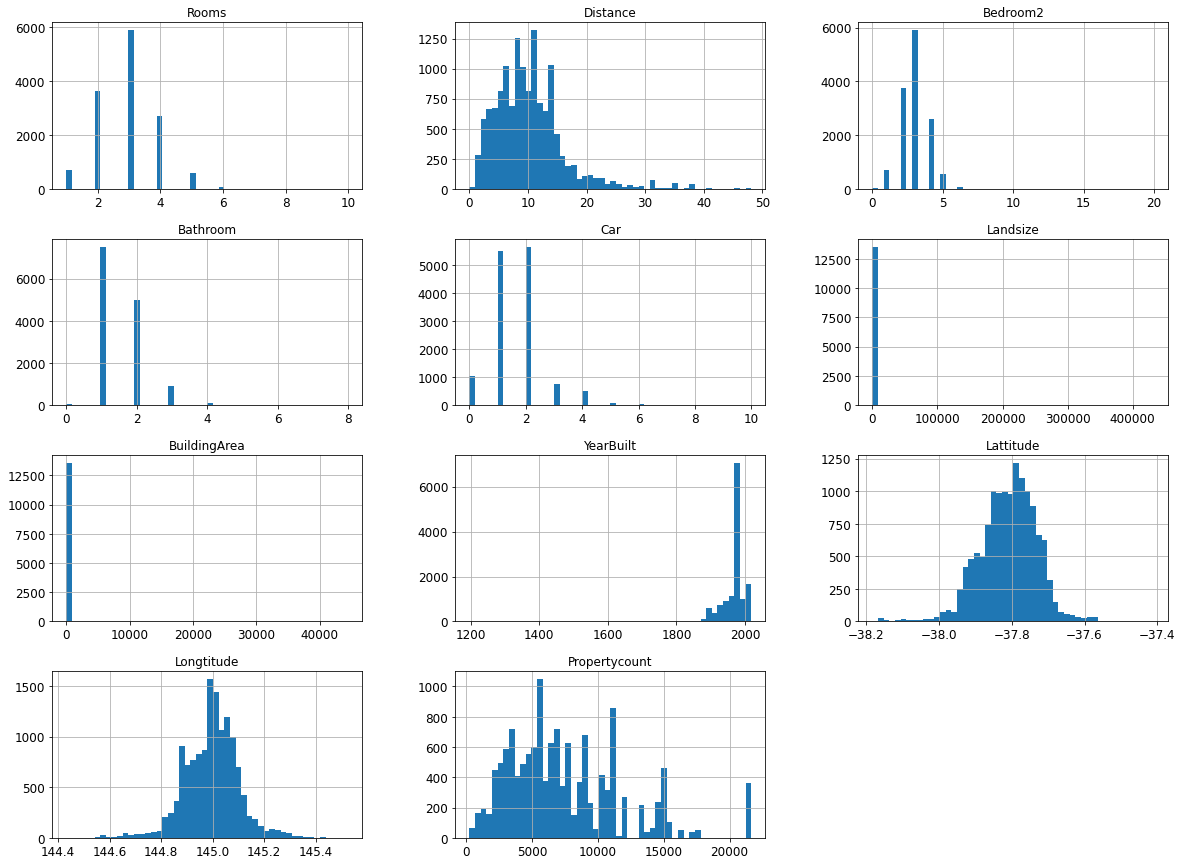

In [107]:
X_cleaned.hist(bins=50, figsize=(20, 15))
plt.show()

In [111]:
# Graph of BuidingArea & Landsize seems weird because there are outliers having very large value
print(housing.Landsize.head(10).median())
print(housing.BuildingArea.head(10).median())

168.5
124.5


In [113]:
# https://www.geeksforgeeks.org/matplotlib-pyplot-subplots-in-python/
def plot_quantile(data=None, q=0.1, ax=None, title=None, bins=20):
    # data is a dataFrame
    if ax == None:
        raise Exception('No axix "ax" is provided')
        
    low = data.quantile(0.05).values[0]
    high = data.quantile(0.95).values[0]

    ax.hist(data, bins=bins, range=(low, high))
    if title != None:
        ax.set_title(title)

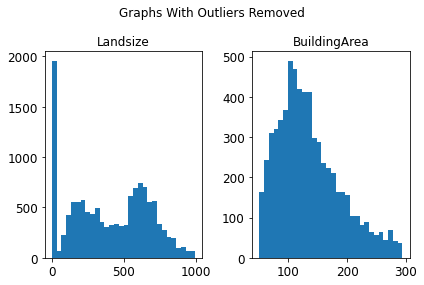

In [114]:
# Remove the outliers using quantiles and set x-axis range according to quantiles
fig, (ax1, ax2) = plt.subplots(1, 2)

plot_quantile(data=housing[['Landsize']], q=0.05, ax=ax1, title='Landsize', bins=30)
plot_quantile(data=housing[['BuildingArea']], q=0.05, ax=ax2, title='BuildingArea', bins=30)

fig.suptitle('Graphs With Outliers Removed')
fig.tight_layout()
plt.show()

In [115]:
print('max_landsize: ', max(housing.Landsize), 'min_landsize: ', min(housing.Landsize))
# print('max_buildarea: ', max(housing.BuildingArea))

max_landsize:  433014.0 min_landsize:  0.0


# Data Split

## StratifiedShuffleSplit

In [84]:
# Observe that 'Distance' feature has a typical distribution
# we can consider split using idea of different classes

housing['dist_cat'] = pd.cut(
    housing.Distance, 
    bins=[0., 6., 12., 18., 24., np.inf], 
    labels=[1, 2, 3, 4, 5]
)

In [86]:
housing.dist_cat.value_counts()

2    6230
1    3254
3    3169
4     522
5     399
Name: dist_cat, dtype: int64

<AxesSubplot:>

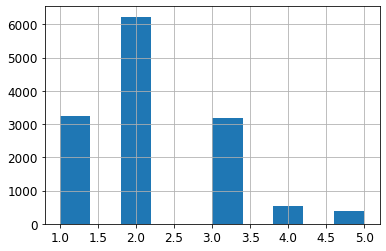

In [87]:
housing.dist_cat.hist()

In [88]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["dist_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Data Split

In [6]:
from sklearn.model_selection import train_test_split
# Seperate housing data into features and labels
y = housing.Price
X = housing.drop(['Price'], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Transformer

## Numerial Trans

## Parsing Date Trans

In [14]:
# 2. Parsing Date Transformer

# index of columns to be deleted
date_cols = ['Date']

for col in date_cols:
    if col in cat_cols:
        cat_cols.remove(col)
print('cat_cols: ', cat_cols, len(cat_cols))

cat_cols:  ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname'] 7


In [15]:
class ParseDateTrans(BaseEstimator, TransformerMixin):
    def __init__(self, cols = date_cols):
        self.cols = cols
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        X_ = X.copy()
        X_['ParsedDate'] = pd.to_datetime(X_['Date'], format="%d/%m/%y", infer_datetime_format=True)
        return X_.drop(self.cols, axis=1)

## Remove Unwanted Trans

## Categorical Trans

### High Card Trans

In [18]:
# 3.1 High cardinality Transformer

from collections import Counter

def cumulatively_categorise(column,threshold=0.75,return_categories_list=True):
    #Find the threshold value using the percentage and number of instances in the column
    threshold_value=int(threshold*len(column))
    #Initialise an empty list for our new minimised categories
    categories_list=[]
    #Initialise a variable to calculate the sum of frequencies
    s=0
    #Create a counter dictionary of the form unique_value: frequency
    counts=Counter(column)

    #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
    for i,j in counts.most_common():
        #Add the frequency to the global sum
        s+=dict(counts)[i]
        #Append the category name to the list
        categories_list.append(i)
        #Check if the global sum has reached the threshold value, if so break the loop
        if s>=threshold_value:
            break
    #Append the category Other to the list
    categories_list.append('Other')

    #Replace all instances not in our new categories by Other  
    new_column=column.apply(lambda x: x if x in categories_list else 'Other')

    #Return transformed column and unique values if return_categories=True
    if(return_categories_list):
        return new_column,categories_list
    #Return only the transformed column if return_categories=False
    else:
        return new_column

In [66]:
# high_card_cols = ['Regionname', 'CouncilArea']
class HighCardAggregation(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.cols = high_card_cols
        pass

    def fit(self, X, y = None):
        return self

    def transform(self, X, y = None):
        # X is a numpy array, the columns to with high cardinality
        X_ = X.copy()
        X_df = pd.DataFrame(X, columns=high_card_cols)
        
        for col in self.cols:
            # transformed_columns is a pandas dataframe
            transformed_column, trans_list = cumulatively_categorise(column=X_df[col], threshold=0.75)
#             print('transformed_column: \n', transformed_column.value_counts())
            X_ = np.c_[X_, transformed_column.to_numpy()]
            
        X_ = np.delete(X_, [i for i in range(len(self.cols))], 1)
        return X_

# Pipeline

In [200]:
low_card_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

high_card_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('aggregation', HighCardAggregation()),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Numerical transformer
num_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

# Categorical transformers
cat_trans = ColumnTransformer(transformers=[
    ('low_card_pipeline', low_card_pipe, low_card_cols),
    ('high_card_pipeline', high_card_pipe, high_card_cols)
])

# # Removal & Parsing Date Pipeline!!!
# clean_pipe = Pipeline(steps=[
#     ('rmUnwanted', RemoveUnwantedCatTrans()),
#     ('imputer', imputer_col_trans),
# #     ('parseDate', ParseDateTrans())
# ])

num_cat_col_trans = ColumnTransformer(transformers=[
    ('num', num_trans, num_cols),
    ('cat', cat_trans, cat_cols)
])

preprocessor = Pipeline([
    ('cleaning', clean_pipe),
    ('num_cat', num_cat_col_trans)
])

'''
# !!!Use the full pipeline when model are ready to deploy or use!!!
# full_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
# #     ('model', LinearRegression())
#     ('model', RandomForestRegressor(n_estimators=50, random_state=42))
# ])
'''

"\n# !!!Use the full pipeline when model are ready to deploy or use!!!\n# full_pipeline = Pipeline([\n#     ('preprocessor', preprocessor),\n# #     ('model', LinearRegression())\n#     ('model', RandomForestRegressor(n_estimators=50, random_state=42))\n# ])\n"

# Testing

In [182]:
data_prepared = preprocessor.fit_transform(X_train)
data_prepared[0]

array([-2.01887631, -0.87114307, -1.96884322, -0.77259924, -0.63232155,
       -0.12911849, -0.03342983, -0.94714018, -0.62833385, -0.08061267,
        1.32236223,  0.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ])

In [92]:
data_prepared[0].shape

(39,)

In [ ]:
# # remaining cat_cols = ['Type', 'Method', 'Regionname', 'CouncilArea']
# 11 + 3 + 5 + 8 + 12 = 39

# data_prepared.shape: (10864, 39)

In [181]:
# Just for testing!!!!!

onehot = OneHotEncoder()
cols = ['CouncilArea']
t2 = ColumnTransformer(transformers=[
#     ('low_card_pipeline', low_card_pipe, cols),
    ('high_card_pipeline', high_card_pipe, cols)
])

t1 = ColumnTransformer(transformers=[
    ('2', t2, cols)
])

p = Pipeline([
    ('1', t1)
])

p_prepared = p.fit_transform(X_train)
p_prepared[0].shape

# Model

## Load Model

In [211]:
import joblib
import os
if os.path.isfile('models/forest_reg.pkl'):
    global forest_reg
    forest_reg = joblib.load('models/forest_reg.pkl')
    print('Load Successfull!')
#     global lin_reg = joblib.load('models/lin_reg.pkl')

Load Successfull!


## General

In [199]:
# full_pipeline.fit(X_train, y_train)

In [188]:
# y_pred = full_pipeline.predict(X_valid)

## Linear Regression

In [ ]:
# full_pipeline.fit(X_train, y_train)

In [141]:
# y_pred = full_pipeline.predict(X_valid)

LinearRegression()

## Random Forest Regression 

In [201]:
# V1 model has been saved to /models

# X_train_prepared = preprocessor.fit_transform(X_train)
# forest_reg = RandomForestRegressor(n_estimators=50, random_state=42)
# forest_reg.fit(X_train_prepared, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [205]:
# X_valid_prepared = preprocessor.transform(X_valid)
# y_pred = forest_reg.predict(X_valid_prepared)

## Saving Models 

In [207]:
joblib.dump(forest_reg, 'models/forest_reg.pkl')
# joblib.dump(lin_reg, 'models/lin_reg.pkl')

['models/lin_reg.pkl']

# Evaluation

In [193]:
for a,b, c in zip(y_valid.index[:10], y_valid[:10], y_pred):
    print(a, ' ', b, ' ', c)

8505   2165000.0   1505820.0
5523   815000.0   881876.6666666665
12852   610000.0   613400.0
4818   1245000.0   1334560.0
12812   1160000.0   878490.0
2153   1250000.0   1337136.0
9903   715000.0   721880.0
5105   812000.0   905400.0
6107   750500.0   752310.0
8876   610000.0   630320.0


In [212]:
forest_rmse = mean_squared_error(y_pred, y_valid, squared=False)
forest_rmse

269056.33741069405